In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('data/student-mat.csv', sep=';')


In [4]:
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (395, 33)

First few rows:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [5]:
print("\nColumns in dataset:")
print(df.columns.tolist())


Columns in dataset:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [6]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std     

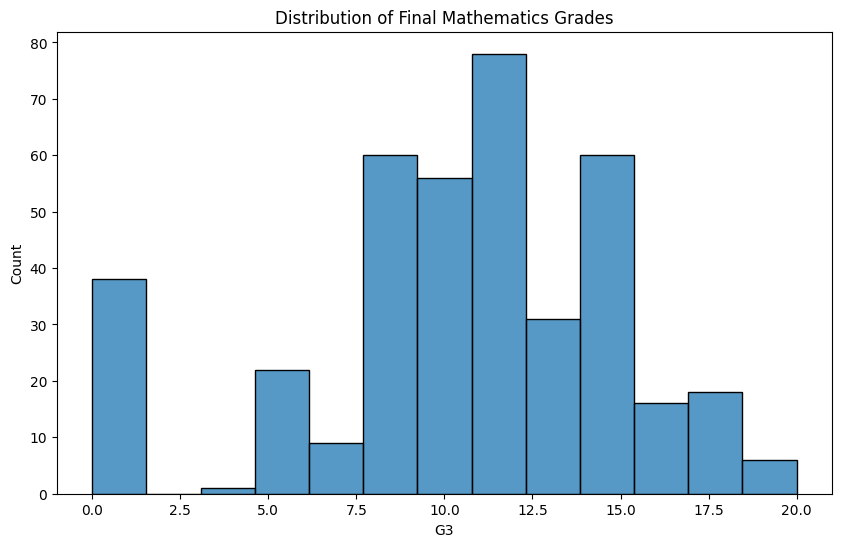

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='G3')
plt.title('Distribution of Final Mathematics Grades')
plt.show()

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the data
df = pd.read_csv('data/student-mat.csv', sep=';')

# Let's identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns.tolist())

# For binary categories like 'sex', 'address', etc., we can use Label Encoding
binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 
                 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# For multi-category variables, we'll use One-Hot Encoding
multi_cat_columns = ['school', 'Mjob', 'Fjob', 'reason', 'guardian']

# Apply Label Encoding to binary columns
le = LabelEncoder()
for col in binary_columns:
    df[col] = le.fit_transform(df[col])
    print(f"\nEncoding for {col}:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))

# Apply One-Hot Encoding to multi-category columns
df = pd.get_dummies(df, columns=multi_cat_columns, prefix=multi_cat_columns)

# Display the first few rows of the encoded dataset
print("\nFirst few rows of encoded dataset:")
print(df.head())

# Verify all categorical variables have been encoded
remaining_categorical = df.select_dtypes(include=['object']).columns
print("\nRemaining categorical columns (should be empty):", remaining_categorical.tolist())

# Save the number of features after encoding
print("\nNumber of features after encoding:", len(df.columns))

Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Encoding for sex:
{'F': np.int64(0), 'M': np.int64(1)}

Encoding for address:
{'R': np.int64(0), 'U': np.int64(1)}

Encoding for famsize:
{'GT3': np.int64(0), 'LE3': np.int64(1)}

Encoding for Pstatus:
{'A': np.int64(0), 'T': np.int64(1)}

Encoding for schoolsup:
{'no': np.int64(0), 'yes': np.int64(1)}

Encoding for famsup:
{'no': np.int64(0), 'yes': np.int64(1)}

Encoding for paid:
{'no': np.int64(0), 'yes': np.int64(1)}

Encoding for activities:
{'no': np.int64(0), 'yes': np.int64(1)}

Encoding for nursery:
{'no': np.int64(0), 'yes': np.int64(1)}

Encoding for higher:
{'no': np.int64(0), 'yes': np.int64(1)}

Encoding for internet:
{'no': np.int64(0), 'yes': np.int64(1)}

Encoding for romantic:
{'no': np.int64(0), 'yes': np.int64(1)}

First few rows of encoded dataset:
   sex  age  addre